In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import plotly.graph_objects as go
from render.pose_utils import add_camera_trace
from PIL import Image

In [9]:
data_dir = "data/nerf_synthetic/fix_lighting/sony"
train_pose = os.path.join(data_dir, "transforms_train.json")
val_pose = os.path.join(data_dir, "transforms_val.json")

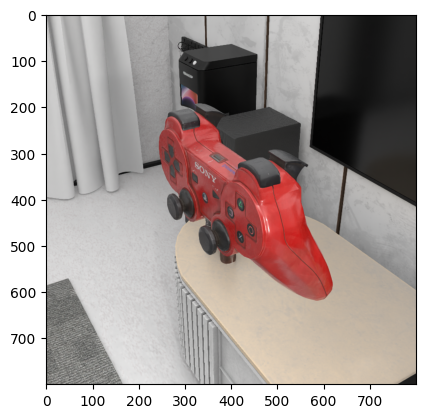

In [10]:
img = os.path.join(data_dir,"00_000.png")
img = Image.open(img)
img = np.array(img)[..., :3]
plt.imshow(img)
plt.show()

In [11]:
with open (train_pose, "r") as fp:
    meta = json.load(fp)

In [12]:
obj_poses = []
cam_poses = []
virtual_cam_poses = []
for frame in meta["frames"]:
    file_path = frame['file_path']
    if "00_" not in file_path and "01_" not in file_path:
        continue
        
    obj_poses.append(frame["object"])
    cam_poses.append(frame["transform_matrix"])
    virtual_cam_poses.append(np.linalg.inv(obj_poses[-1]) @ cam_poses[-1])

obj_poses = np.array(obj_poses)
cam_poses = np.array(cam_poses)
virtual_cam_poses = np.array(virtual_cam_poses)

# cam_poses[:, :3, 1:3] *= -1
# virtual_cam_poses[:, :3, 1:3] *= -1

print(virtual_cam_poses.shape)


(46, 4, 4)


In [13]:
fig = go.Figure()
scene_dict = dict(xaxis=dict(range=[-5, 5], autorange=False),
                      yaxis=dict(range=[-5, 5], autorange=False),
                      zaxis=dict(range=[-5, 5], autorange=False))
add_camera_trace(fig, virtual_cam_poses, trace_name="vcam", camera_scale=0.2)
add_camera_trace(fig, cam_poses, trace_name="real camera", camera_scale=0.2)
fig.update_layout(scene=scene_dict, width=1400, height=1400, showlegend=True)
fig.show()

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pytransform3d.camera as pc
import pytransform3d.transformations as pt

ModuleNotFoundError: No module named 'pytransform3d'

In [ ]:

sensor_size = np.array([0.036, 0.024])
intrinsic_matrix = np.array([
    [0.05, 0, sensor_size[0] / 2.0],
    [0, 0.05, sensor_size[1] / 2.0],
    [0, 0, 1]
])
virtual_image_distance = 1
virtual_cam_poses_opencv = np.stack([virtual_cam_poses[..., 0], -virtual_cam_poses[..., 1], -virtual_cam_poses[..., 2], virtual_cam_poses[..., 3]], axis=2)[::1]
for i in range(len(virtual_cam_poses_opencv)):
    ax = pt.plot_transform(A2B=virtual_cam_poses_opencv[i], s=0.3)
    pc.plot_camera(ax, cam2world=virtual_cam_poses_opencv[i], M=intrinsic_matrix, sensor_size=sensor_size, virtual_image_distance=virtual_image_distance)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
ax.set_zlim(-5, 5)
plt.show()